# Box-Cox Transform


## What is the Box-Cox Transform?

The Box-Cox transforms non-normal data to normal distribution like data.

Why do we need our time series data to resemble a normal distribution? Well, when fitting certain models, such as ARIMA, they use the maximum likelihood estimation (MLE) to determine their parameters. MLE by definition must fit against a certain distribution, which for most packages is the normal distribution.

The Box-Cox transformation is parameterised by λ (that takes real values from -5 to 5) and transforms the time series, y, as:

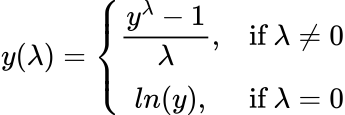

We see that with λ=0 it is the natural log transform, however there are many others depending on the value λ.

For example, if λ=0 it is the square root transform, λ=1 there is no transform and λ=3 is the cubic transform.

The value λ is chosen by seeing which value best approximates the transformed data to the normal distribution. Luckily, in computing packages this is easily done for us!

## Visualise Data


In [ ]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import boxcox

In [ ]:
# Read in the data
data = pd.read_csv('AirPassengers.csv')

In [ ]:
def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the passenger data."""
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=title, width=650,
                      title_x=0.5, height=400)

    fig.show()

In [ ]:
# Plot the airline passenger data
plotting(title='Airline Passengers', data=data, x='Month',
         y='#Passengers', x_label='Date', y_label='Passengers')

The data is clearly not stationary as the mean and variance are both increasing with time. To stabilise the variance, we can use the Box-Cox transform like we discussed above.

## Applying Box-Cox

In [ ]:
# Apply box-cox transform and plot it
data['Passengers_box_cox'], lam = boxcox(data['#Passengers'])

plotting(title='Airline Passengers', data=data, x='Month', y='Passengers_box_cox',
         x_label='Date', y_label='Passengers<br>Box-Cox Transform', text=True, lam=lam)

Our variance is now stable and the fluctuations are on a consistent level! The optimal λ value is 0.148, which is near a perfect natural logarithmic transform but not quite. 